In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

%matplotlib notebook

df_bio = pd.read_csv('BioParams.csv',delimiter='\t')
df_location = pd.read_csv('Location.csv',delimiter='\t')


In [15]:
time = df_bio['time']
x0 = df_location.x_0
y0 = df_location.y_0
x1 = df_location.x_1
y1 = df_location.y_1
x2 = df_location.x_2
y2 = df_location.y_2
x3 = df_location.x_3
y3 = df_location.y_3
x4 = df_location.x_4
y4 = df_location.y_4
x5 = df_location.x_5
y5 = df_location.y_5

#df_location

<IPython.core.display.Javascript object>


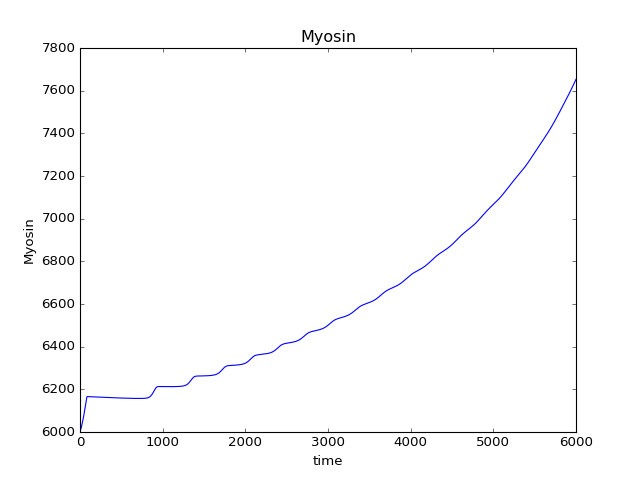

In [16]:
plt.figure(1)
plt.title('Myosin')
plt.plot(time,df_bio.myo5)
plt.xlabel("time")
plt.ylabel("Myosin")
plt.show()

<IPython.core.display.Javascript object>


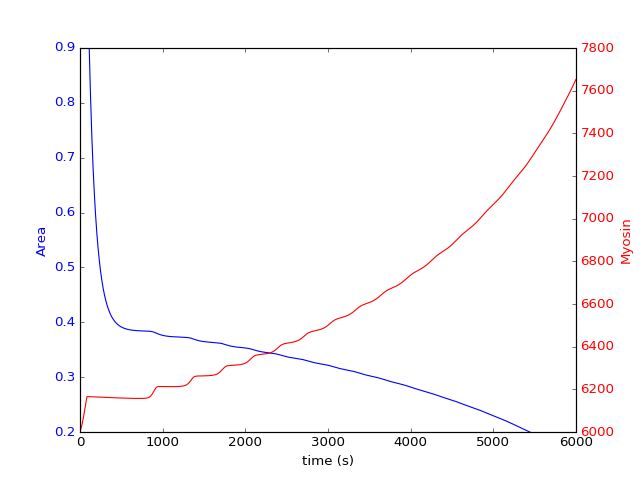

In [28]:
fig, ax1 = plt.subplots()
#plt.title('Area')
ax1.plot(time,df_location.area,'b-')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Area', color='b')
ax1.set_ylim(0.2,0.9)
for tl in ax1.get_yticklabels():
    tl.set_color('b')
    
ax2 = ax1.twinx()
ax2.plot(time, df_bio.myo5, 'r-')
ax2.set_ylabel('Myosin', color='r')
#ax2.set_ylim(0,0.02)
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.show()

<IPython.core.display.Javascript object>


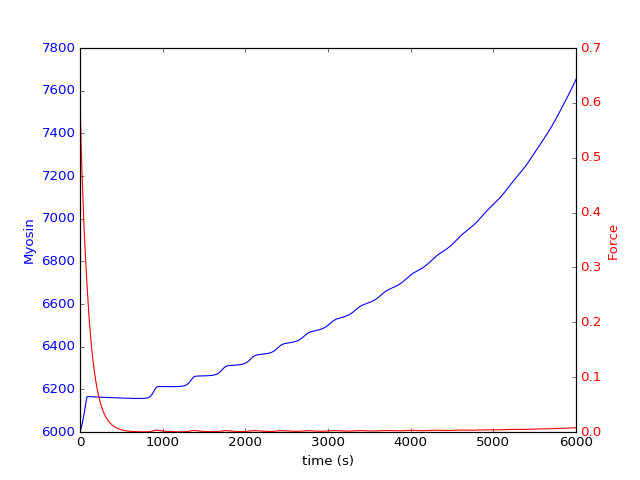

In [12]:
fig, ax1 = plt.subplots()
plt.title('')
ax1.plot(time,df_bio.myo0,'b-')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Myosin', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
    
ax2 = ax1.twinx()
ax2.plot(time, df_bio.force0, 'r-')
ax2.set_ylabel('Force', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.show()

In [18]:
dt = np.diff(time)

In [19]:
print("The max dt used was: ", np.amax(dt))
print("The min dt used was: ", np.amin(dt))
print("The mean dt used was:", np.mean(dt))
np.mean(dt)*10

The max dt used was:  0.0100000000016
The min dt used was:  9.99999997475e-07
The mean dt used was: 0.00885471724978


0.088547172497782378

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


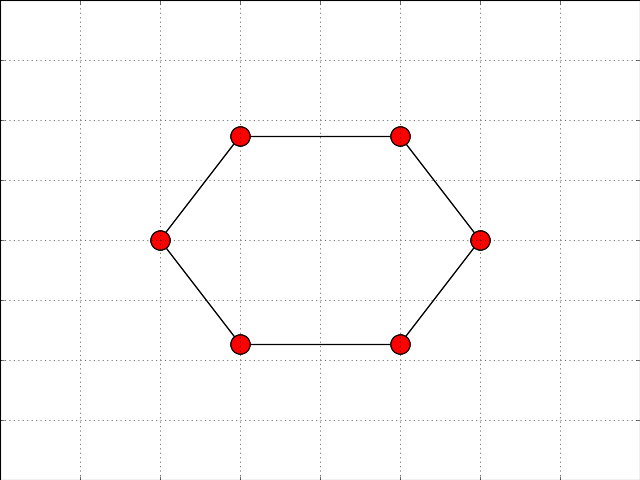

/home/cdurney/anaconda3/lib/python3.5/site-packages/matplotlib/backend_bases.py:2437: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


NotImplementedError: 

In [20]:
%matplotlib auto
p0 = (x0[0],y0[0])
p1 = (x1[0],y1[0])
p2 = (x2[0],y2[0])
p3 = (x3[0],y3[0])
p4 = (x4[0],y4[0])
p5 = (x5[0],y5[0])

nodes = [p0,p1,p2,p3,p4,p5]

G = nx.Graph()

i = 0
for node in nodes:
    G.add_node(i,{'pos':node,'cell':1})
#    G.add_edge('medial',i,{'name':1})
    i += 1
G.add_path([0,1,2,3,4,5,0])

fig = plt.figure()

pos = nx.get_node_attributes(G,'pos')

nx.draw(G,pos)
plt.title("Time")
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.axis("on")
plt.grid("on")

for i in range(1,len(time),1000):
    G.node[0]['pos'] = (x0[i],y0[i])
    G.node[1]['pos'] = (x1[i],y1[i])
    G.node[2]['pos'] = (x2[i],y2[i])
    G.node[3]['pos'] = (x3[i],y3[i])
    G.node[4]['pos'] = (x4[i],y4[i])
    G.node[5]['pos'] = (x5[i],y5[i])

    pos = nx.get_node_attributes(G,'pos')
    nx.draw(G,pos)
    plt.title('Time')
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.axis("on")
    plt.grid("on")
    plt.pause(0.5)

plt.show()